# Challenge: model comparison
You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [12]:
#use the student performance dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

stu = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

stu.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(stu[['math score', 'reading score']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
scaled_features = scaler.transform(stu[['math score', 'reading score']])

array([[ 0.39002351,  0.19399858],
       [ 0.19207553,  1.42747598],
       [ 1.57771141,  1.77010859],
       ...,
       [-0.46775108,  0.12547206],
       [ 0.12609287,  0.60515772],
       [ 0.71993682,  1.15336989]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, stu['writing score'],
                                                    test_size=0.30)

In [30]:
#KNN regression 
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train, y_train)

y_preds_train_knn = knn.predict(X_train)
y_preds_test_knn = knn.predict(X_test)

print("Summary for KNN Regression Model")
print("--------------------------------------------------------------------------")
print("R-squared of the model in the training set is: {}".format(knn.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_knn)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_knn)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test_knn) / y_test)) * 100))

Summary for KNN Regression Model
--------------------------------------------------------------------------
R-squared of the model in the training set is: 0.9215353342413862
-----Test set statistics-----
R-squared of the model in the test set is: 0.895890213364343
Mean absolute error of the prediction is: 3.8083333333333327
Mean squared error of the prediction is: 21.708186695210678
Root mean squared error of the prediction is: 4.834152804094357
Mean absolute percentage error of the prediction is: 6.33166230400673


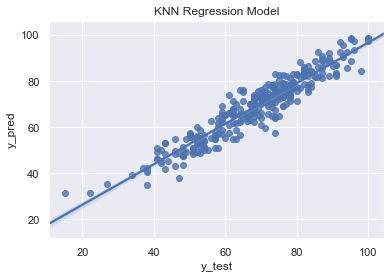

In [35]:
sns.regplot(y_test, y_preds_test_knn, fit_reg=True)

plt.title("KNN Regression Model")
plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

In [32]:
#Linear regression model 

lrm = LinearRegression()

lrm.fit(X_train, y_train)

y_preds_train_lrm = lrm.predict(X_train)
y_preds_test_lrm = lrm.predict(X_test)


print("Summary for OLS Regression Model")
print("--------------------------------------------------------------------------")
print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_lrm)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_lrm)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lrm) / y_test)) * 100))

Summary for OLS Regression Model
--------------------------------------------------------------------------
R-squared of the model in the training set is: 0.9164210741100746
-----Test set statistics-----
R-squared of the model in the test set is: 0.9032893379521307
Mean absolute error of the prediction is: 3.670231214719582
Mean squared error of the prediction is: 21.708186695210678
Root mean squared error of the prediction is: 4.659204513134262
Mean absolute percentage error of the prediction is: 5.945539235195778


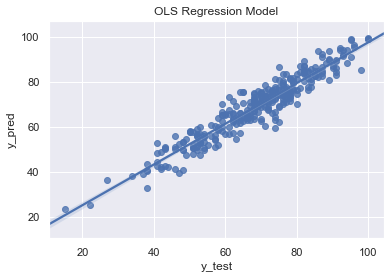

In [36]:
sns.regplot(y_test, y_preds_test_lrm, fit_reg=True)

plt.title("OLS Regression Model")
plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

In [37]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(lrm, X, Y, cv=5)
print("OLS Regression Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

KNN Accuracy: 0.90 (+/- 0.02)
OLS Regression Accuracy: 0.91 (+/- 0.02)


As we can see from the results, OLS regression model performs better. It yields larger explained variance and smaller error, and higher cross-validation accuracy. The KNN model didn't fit the lowest performing student as good as OLS regression model.